# load functions

In [1]:
suppressMessages(suppressWarnings(source("./jupyter_common.R")))
load('./rdata/jupyter_common.rdata')
load('./rdata/riboprof_170224.rdna_rn18s_161021.rdna_rn18s_limma-voom.mrna.rdata')


# common parameters

In [2]:
f_display_sym <- TRUE
seed_geom_text_repel <- 40

biotype_exclude <- NULL
#biotype_exclude <- "pseudogene"
#biotype_exclude <- "protein_coding|pseudogene"

biotype_include <- NULL
#biotype_include <- "protein_coding"

# rsem with --outFilterMultimapNmax 20
fname_appendix <- ""

# htseq
#fname_appendix <- "_htseq"

if (!is.null(biotype_include)) {
    fname_appendix <- sprintf("%s_%s", fname_appendix, gsub("\\|", "_", biotype_include))
} 
if (!is.null(biotype_exclude)) {
    fname_appendix <- sprintf("%s_wo_%s", fname_appendix, gsub("\\|", "_", biotype_exclude))
} 

fname_appendix



[1] ""

# common variables

In [3]:
if (!is.null(biotype_exclude)) {
    f <- grepl(biotype_exclude, df_all$biotype)
    df_exclude <- df_all[f, ]
    show(head(df_exclude))
    show(dim(df_exclude))
    excludes <- rownames(df_exclude)
    
    sym_ribo_up_cx_dn <- setdiff(sym_ribo_up_cx_dn, excludes)
    sym_ribo_dn_cx_up <- setdiff(sym_ribo_dn_cx_up, excludes)
    sym_ribo_up_cx_up <- setdiff(sym_ribo_up_cx_up, excludes)
    sym_ribo_dn_cx_dn <- setdiff(sym_ribo_dn_cx_dn, excludes)
    sym_ribo_cx_exclusively_affected <- setdiff(sym_ribo_cx_exclusively_affected, 
        excludes)
}

In [4]:
if (!is.null(biotype_include)) {
    f <- grepl(biotype_include, df_all$biotype)
    df_include <- df_all[f, ]
    show(head(df_include))
    show(dim(df_include))
    include_genes <- rownames(df_include)
    
    sym_ribo_up_cx_dn <- intersect(sym_ribo_up_cx_dn, include_genes)
    sym_ribo_dn_cx_up <- intersect(sym_ribo_dn_cx_up, include_genes)
    sym_ribo_up_cx_up <- intersect(sym_ribo_up_cx_up, include_genes)
    sym_ribo_dn_cx_dn <- intersect(sym_ribo_dn_cx_dn, include_genes)
    sym_ribo_cx_exclusively_affected <- intersect(sym_ribo_cx_exclusively_affected, 
        include_genes)
}

# df_fig

In [5]:
df_fig <- df_all
sym <- rownames(df_fig)
df_fig$fig.type <- NA

verb("sym_ribo_up_cx_dn: %d\n", length(sym_ribo_up_cx_dn))
f <- sym %in% sym_ribo_up_cx_dn
str_up_dn <- sprintf("Up-Down (n=%d)", length(sym_ribo_up_cx_dn))
df_fig[f, "fig.type"] <- str_up_dn

verb("sym_ribo_dn_cx_up: %d\n", length(sym_ribo_dn_cx_up))
f <- sym %in% sym_ribo_dn_cx_up
str_dn_up <- sprintf("Down-Up (n=%d)", length(sym_ribo_dn_cx_up))
df_fig[f, "fig.type"] <- str_dn_up

verb("sym_ribo_up_cx_up: %d\n", length(sym_ribo_up_cx_up))
f <- sym %in% sym_ribo_up_cx_up
str_up_up <- sprintf("Up-Up (n=%d)", length(sym_ribo_up_cx_up))
df_fig[f, "fig.type"] <- str_up_up

verb("sym_ribo_dn_cx_dn: %d\n", length(sym_ribo_dn_cx_dn))
f <- sym %in% sym_ribo_dn_cx_dn
str_dn_dn <- sprintf("Down-Down (n=%d)", length(sym_ribo_dn_cx_dn))
df_fig[f, "fig.type"] <- str_dn_dn

verb("sym_ribo_cx_exclusively_affected: %d\n", length(sym_ribo_cx_exclusively_affected))
f <- sym %in% sym_ribo_cx_exclusively_affected
# str_cx <- sprintf('Exclusively CX-affected (n=%d)',
# length(sym_ribo_cx_exclusively_affected))
str_cx <- sprintf("Excl. CX-affected (n=%d)", length(sym_ribo_cx_exclusively_affected))
df_fig[f, "fig.type"] <- str_cx
# verb('sym_ribo_cx_unaffected: %d\n',length(sym_ribo_cx_unaffected)); f <- sym
# %in% sym_ribo_cx_unaffected; df_fig[f, 'fig.type'] <- 'CX-unaffected'

#f <- !is.na(df_fig$fig.type) & !is.na(df_fig$log2FCunt48VStgfb48.translation) & !is.na(df_fig$log2FCtgfbVStgfbCX5461100nm.translation)
#df_fig <- df_fig[f, ]
df_fig$fig.type <- factor(df_fig$fig.type, level = c(str_up_dn, str_dn_up, str_up_up, 
    str_dn_dn, str_cx))
# reorder
df_fig$order <- factor(df_fig$fig.type, level = c(str_cx, str_up_up, str_dn_dn, str_up_dn, 
    str_dn_up))
df_fig <- df_fig[order(df_fig$order), ]

nv_color <- c(`Up-Down` = "#ed7470", `Down-Up` = "#7aaa3d", `Up-Up` = "#e5af3c", 
    `Down-Down` = "#73c4fa", `Exclusively CX-affected` = "#aaaaaa")
names(nv_color) <- levels(df_fig$fig.type)

sym_ribo_up_cx_dn: 414
sym_ribo_dn_cx_up: 209
sym_ribo_up_cx_up: 78
sym_ribo_dn_cx_dn: 49
sym_ribo_cx_exclusively_affected: 945


# n-R5s

In [6]:
df_fig_r5s  <- df_fig
df_fig_r5s$sym <- rownames(df_fig_r5s)

f <- grepl("n-R5s", df_fig_r5s$sym)
df_fig_r5s <- df_fig_r5s[f,]
dim(df_fig_r5s)

unique(paste(df_fig_r5s$unt48.tgfb48.DEtranslation,
    df_fig_r5s$tgfb48.tgfbCX5461100nm.DEtranslation))

vec <- gsub(" \\(.*\\)","", df_fig_r5s$fig.type)
vec_u <- levels(df_fig$fig.type)
vec_u <- gsub(" \\(.*\\)","", vec_u)
levels_fig.type <- vec_u
vec_u
for (i in 1:length(vec_u)) {
    idx <- grep(vec_u[i], vec)
    levels_fig.type[i] <- sprintf("%s (n=%d)", vec_u[i], length(idx))
    vec[idx] <- levels_fig.type[i]
}

f <- df_fig_r5s$unt48.tgfb48.DEtranslation == "up" & df_fig_r5s$tgfb48.tgfbCX5461100nm.DEtranslation == "notSig"
str_up_no <- sprintf("Up-notSig (n=%d)", length(which(f)))
vec[f] <- str_up_no

f <- df_fig_r5s$unt48.tgfb48.DEtranslation == "notSig" & df_fig_r5s$tgfb48.tgfbCX5461100nm.DEtranslation == "notSig"
str_no_no <- sprintf("notSig-notSig (n=%d)", length(which(f)))
vec[f] <- str_no_no


df_fig_r5s$fig.type <- factor(vec, level = c(levels_fig.type, str_up_no, str_no_no))
nv_color <- c(`Up-Down` = "#ed7470", `Down-Up` = "#7aaa3d", `Up-Up` = "#e5af3c", 
    `Down-Down` = "#73c4fa", `Exclusively CX-affected` = "#aaaaaa")
nv_color <- c(nv_color, `Up-notSig` = "#ffc0cb", `notSig-notSig` = "#d3d3d3")
names(nv_color) <- c(levels_fig.type, str_up_no, str_no_no)

df_fig_r5s
dim(df_fig_r5s)

[1] 45 34

[1] "notSig up"     "notSig down"   "up up"         "up down"      
[5] "notSig notSig" "up notSig"

[1] "Up-Down"           "Down-Up"           "Up-Up"            
[4] "Down-Down"         "Excl. CX-affected"

,seqnames,start,end,width,strand,source,unt48.transcription,tgfb48.transcription,tgfbCX5461100nm.transcription,log2FCunt48VStgfb48.transcription,⋯,log2FCtgfbVStgfbCX5461100nm.translation,FDRtgfbVStgfbCX5461100nm.translation,PtgfbVStgfbCX5461100nm.translation,unt48.tgfb48.DEtranslation,tgfb48.tgfbCX5461100nm.DEtranslation,reversible.translation,biotype,fig.type,order,sym
,<fct>,<int>,<int>,<int>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<fct>,<fct>,<chr>
n-R5s115,8,123564286,123564404,119,-,ensembl,NA,NA,NA,NA,⋯,1.59455305,7.900000e-10,0.0000000000,notSig,up,notSig,rRNA,Excl. CX-affected (n=13),Excl. CX-affected (n=945),n-R5s115
n-R5s136,8,123599861,123599979,119,-,ensembl,NA,NA,NA,NA,⋯,1.18620819,1.113022e-02,0.0010470566,notSig,up,notSig,rRNA,Excl. CX-affected (n=13),Excl. CX-affected (n=945),n-R5s136
n-R5s162,6,60250792,60250910,119,+,ensembl,NA,NA,NA,NA,⋯,2.13333959,1.304027e-03,0.0000683344,notSig,up,notSig,rRNA,Excl. CX-affected (n=13),Excl. CX-affected (n=945),n-R5s162
n-R5s182,4,12812706,12812812,107,+,ensembl,NA,NA,NA,NA,⋯,1.31961002,2.568763e-02,0.0032162317,notSig,up,notSig,rRNA,Excl. CX-affected (n=13),Excl. CX-affected (n=945),n-R5s182
n-R5s197,3,88906510,88906628,119,+,ensembl,NA,NA,NA,NA,⋯,2.58128109,1.333823e-03,0.0000701537,notSig,up,notSig,rRNA,Excl. CX-affected (n=13),Excl. CX-affected (n=945),n-R5s197
n-R5s213,1,82635013,82635110,98,+,ensembl,NA,NA,NA,NA,⋯,-1.06532712,4.218346e-04,0.0000176597,notSig,down,notSig,rRNA,Excl. CX-affected (n=13),Excl. CX-affected (n=945),n-R5s213
n-R5s29,17,78858934,78859052,119,+,ensembl,NA,NA,NA,NA,⋯,3.02493536,2.053298e-04,0.0000071070,notSig,up,notSig,rRNA,Excl. CX-affected (n=13),Excl. CX-affected (n=945),n-R5s29
n-R5s5,X,18323444,18323562,119,-,ensembl,NA,NA,NA,NA,⋯,2.52727726,8.404158e-04,0.0000402210,notSig,up,notSig,rRNA,Excl. CX-affected (n=13),Excl. CX-affected (n=945),n-R5s5
n-R5s52,13,14118743,14118855,113,-,ensembl,NA,NA,NA,NA,⋯,2.71714919,2.949230e-06,0.0000000597,notSig,up,notSig,rRNA,Excl. CX-affected (n=13),Excl. CX-affected (n=945),n-R5s52


[1] 45 34

Loading required package: ggrepel



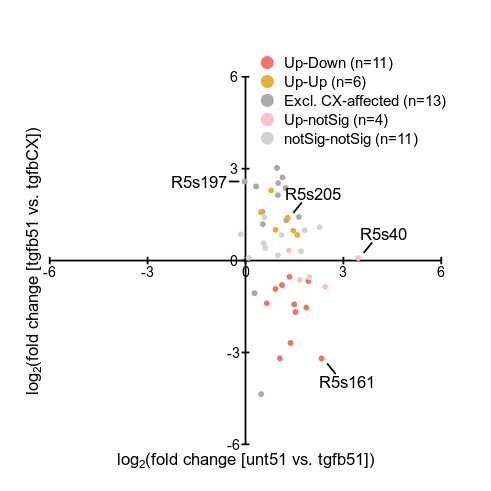

In [7]:
nticks=5; xmax=6; ymax=6; gap_tick_label=3
gg <- ggplot(data=df_fig_r5s,
    aes(x=log2FCunt48VStgfb48.translation, 
        y=log2FCtgfbVStgfbCX5461100nm.translation, colour=fig.type)) + 
    theme_geometry(ticks=nticks, xlim=xmax, ylim=ymax, linesize=0.5, 
                   xlab=expression('log'[2]*'(fold change [unt51 vs. tgfb51])'),
                   ylab=expression('log'[2]*'(fold change [tgfb51 vs. tgfbCX])'),
                   labsize=3.5, labgap=0.5, epsilon=max(xmax,ymax)/50, gap_tick_label=gap_tick_label) +
    geom_point(alpha=1, size=1) +
    theme(legend.title=element_blank(), 
          legend.text=element_text(size=9),
          legend.background = element_rect(color = NA),
          legend.key = element_rect(fill = "white", color = NA),
          legend.key.size = unit(0.4, "cm"),
          legend.key.width = unit(0,"cm"),
          legend.spacing.y = unit(0, "cm"),          
          legend.position = c(0.53, 0.95), legend.justification = c(0, 1) ) +
    guides(colour = guide_legend(override.aes = list(size=3))) +
    ggtitle("") +
    scale_colour_manual(values = nv_color)

if (f_display_sym) {
    
  df_fig_r5s$sig <- 'no'; 
  #f_sym <- grepl('.', df_fig_r5s$sym)  
  f_sym <- grepl('Up-Up', df_fig_r5s$fig.type)    
  # n-R5s197: notSig up
  # n-R5s156 s205: up up
  # n-R5s161: up down
  # n-R5s40: up notSig   
  f_sym <- grepl('n-R5s197|n-R5s205|n-R5s161|n-R5s40', df_fig_r5s$sym)
    
  th_log2fc <- log2(1.2)
  #f_up_dn <- !is.na(df_fig_r5s$fig.type) & df_fig_r5s$log2FCunt48VStgfb48.translation > th_log2fc & df_fig_r5s$log2FCtgfbVStgfbCX5461100nm.translation < -th_log2fc
  #f_up_up <- !is.na(df_fig_r5s$fig.type) & df_fig_r5s$log2FCunt48VStgfb48.translation > th_log2fc & df_fig_r5s$log2FCtgfbVStgfbCX5461100nm.translation > th_log2fc
  f_up_dn <- !is.na(df_fig_r5s$fig.type) 
  f_up_up <- !is.na(df_fig_r5s$fig.type)
  df_fig_r5s$sig[f_up_dn & f_sym] <- 'up_dn';
  df_fig_r5s$sig[f_up_up & f_sym] <- 'up_up';
  f <- grepl("Gm|Rik", df_fig_r5s$sym)
  df_fig_r5s$sig[f] <- 'no'

  require('ggrepel')
  df_fig_r5s$nudge_x <- 0.2
  df_fig_r5s$nudge_y <- 0.2
  f <- grepl("n-R5s161", df_fig_r5s$sym)
  df_fig_r5s[f, 'nudge_x'] <- 0.2  
  df_fig_r5s[f, 'nudge_y'] <- -0.2
  f <- grepl("n-R5s197", df_fig_r5s$sym)
  df_fig_r5s[f, 'nudge_x'] <- -0.2  
  df_fig_r5s[f, 'nudge_y'] <- 0
    
  # change name
  df_fig_r5s$sym <- mgsub::mgsub(df_fig_r5s$sym,
        tolower(c('HALLMARK','_')), c('',' '))
  #df_fig_r5s$sym <- str_wrap(df_fig_r5s$sym, width=15)

  f <- df_fig_r5s$sig != 'no'
  if (any(f)) {
  df1 <- df_fig_r5s[f,,drop=F]          
  gg <- gg + geom_text_repel(data=df1,
           aes(label=gsub("n-","",sym), lineheight=.75),
           size=3.5, colour='black',
           force=1, box.padding=0.25, point.padding=0.5,
           min.segment.length = unit(0, 'lines'),          
           nudge_x=df1$nudge_x, nudge_y=df1$nudge_y,
           seed=seed_geom_text_repel)
  }
             
}


print_figure(gg, width=4.1, height=4.1,
            file=sprintf("scatter_plot.fig4%s_r5s", fname_appendix))

## circlize

In [8]:
sort(unique(df_fig_r5s[,1]))

[1] 1  2  3  4  5  6  7  8  9  10 11 12 13 15 16 17 18 X  Y 
46 Levels: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 X Y ... JH584304.1

In [9]:
t(df_fig_r5s[c("n-R5s25","n-R5s28"),])

,n-R5s25,n-R5s28
seqnames,18,17
start,34647400,47848834
end,34647518,47848952
width,119,119
strand,+,+
source,ensembl,ensembl
unt48.transcription,NA,NA
tgfb48.transcription,NA,NA
tgfbCX5461100nm.transcription,NA,NA
log2FCunt48VStgfb48.transcription,NA,NA


Note: 2 points are out of plotting region in sector 'chr1', track '2'.

Note: 2 points are out of plotting region in sector 'chr1', track '2'.

Note: 1 point is out of plotting region in sector 'chr1', track '4'.

Note: 1 point is out of plotting region in sector 'chr1', track '4'.



png 
  2

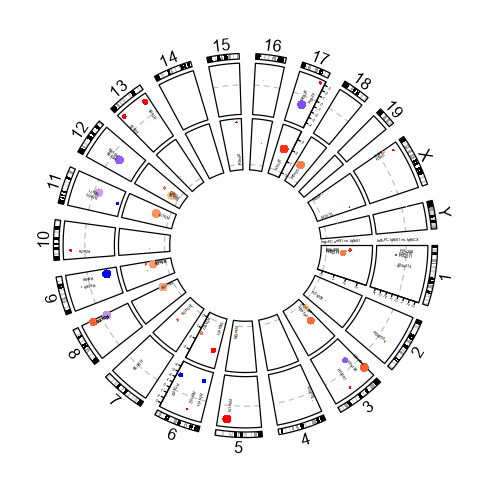

In [10]:
library(circlize)

circos.par(gap.degree = 5)
circos.initializeWithIdeogram(chromosome.index = paste0("chr", c(1:19, "X", "Y")), 
    plotType = c("ideogram", "labels"), species = "mm10")


col_score <- colorRamp2(c(-2, 0, 2), c("#0000ff", "#ffffcc", "#ff0000"))
col_fun = colorRamp2(breaks = -log10(c(1, 0.05, 1e-04)), colors = c("green", "black", 
    "red"))
p_value = c(0.8, 0.5, 0.001)

# CX5461
df <- df_fig_r5s[, c("seqnames", "start", "end", "log2FCtgfbVStgfbCX5461100nm.translation", 
    "FDRtgfbVStgfbCX5461100nm.translation")]
colnames(df) <- c("chr", "start", "end", "value1", "value2")
df$chr <- paste0("chr", df$chr)
df$label <- gsub("n-", "", rownames(df))

circos.genomicTrackPlotRegion(df, stack = FALSE, track.height = 0.25, panel.fun = function(region, 
    value, ...) {
    cell.xlim = get.cell.meta.data("cell.xlim")
    circos.lines(cell.xlim, c(0, 0), lty = 2, col = "#00000040")
    cex = (-log10(value[[2]] + 1e-10))/10
    circos.genomicPoints(region, value, numeric.column = 1, cex = cex, col = col_score(value[[1]]), 
        pch = 16, ...)
    f <- value[[2]] < 0.05
    if (any(f)) {
        circos.genomicText(region[f, , drop = F], value[f, , drop = F], y = 0, labels.column = 3, 
            facing = "clockwise", adj = c(0.5, 0), cex = 0.2)
    }
})

circos.yaxis(side = "right", at = NULL, sector.index = "chr1", labels.cex = 0.2)
circos.yaxis(side = "right", at = NULL, sector.index = "chr6", labels.cex = 0.2)
circos.yaxis(side = "right", at = NULL, sector.index = "chr17", labels.cex = 0.2)
circos.text(sector.index = "chr1", track.index = 2, get.cell.meta.data("cell.xlim") - 
    0.3*mean(get.cell.meta.data("cell.xlim")), get.cell.meta.data("cell.ylim") - 1.35 * 
    max(get.cell.meta.data("cell.ylim")), 
    labels = expression(paste(log[2], FC, ~tgfb51, ~vs., ~tgfbCX)),
    facing = "clockwise", niceFacing = TRUE, adj = c(0, 0), cex = 0.2)

# tgfb48
df <- df_fig_r5s[, c("seqnames", "start", "end", "log2FCunt48VStgfb48.translation", 
    "FDRunt48VStgfb48.translation")]
colnames(df) <- c("chr", "start", "end", "value1", "value2")
df$chr <- paste0("chr", df$chr)
df$label <- gsub("n-", "", rownames(df))

circos.genomicTrackPlotRegion(df, stack = FALSE, track.height = 0.25, panel.fun = function(region, 
    value, ...) {
    cell.xlim = get.cell.meta.data("cell.xlim")
    circos.lines(cell.xlim, c(0, 0), lty = 2, col = "#00000040")
    cex = (-log10(value[[2]] + 1e-10))/10
    circos.genomicPoints(region, value, numeric.column = 1, cex = cex, col = col_score(value[[1]]), 
        pch = 16, ...)
    f <- value[[2]] < 0.05
    if (any(f)) {
        circos.genomicText(region[f, , drop = F], value[f, , drop = F], y = 0, labels.column = 3, 
            facing = "clockwise", adj = c(0, 0.5), cex = 0.2)
    }
})

circos.yaxis(side = "right", at = 0:3, sector.index = "chr1", labels.cex = 0.2)
circos.yaxis(side = "right", at = 0:3, sector.index = "chr6", labels.cex = 0.2)
circos.yaxis(side = "right", at = 0:3, sector.index = "chr17", labels.cex = 0.2)
circos.text(sector.index = "chr1", track.index = 4, get.cell.meta.data("cell.xlim") - 
    0.3*mean(get.cell.meta.data("cell.xlim")), get.cell.meta.data("cell.ylim"),
    labels = expression(paste(log[2], FC, ~unt51, ~vs., ~tgfb51)),
    facing = "clockwise", niceFacing = TRUE, adj = c(0, 0), cex = 0.2)


circos.clear()

pl <- recordPlot()

file <- sprintf("circlize.fig4%s_r5s", fname_appendix)
filename <- sprintf("tiff/%s.tiff", file)
tiff(filename, width = 4.1, height = 4.1, units = "in", res = 600, compression = "lzw", 
    type = "cairo")
print(pl)
dev.off()

# n-R5s in chr8

In [11]:
df_fig_r5s  <- df_fig
df_fig_r5s$sym <- rownames(df_fig_r5s)

f <- df_fig_r5s[,1]=="8"
df_fig_r5s <- df_fig_r5s[f,]

f <- grepl("n-R5s", df_fig_r5s$sym)
df_fig_r5s <- df_fig_r5s[f,]
dim(df_fig_r5s)

unique(paste(df_fig_r5s$unt48.tgfb48.DEtranslation,
    df_fig_r5s$tgfb48.tgfbCX5461100nm.DEtranslation))

vec <- gsub(" \\(.*\\)","", df_fig_r5s$fig.type)
vec_u <- levels(df_fig$fig.type)
vec_u <- gsub(" \\(.*\\)","", vec_u)
levels_fig.type <- vec_u
vec_u
for (i in 1:length(vec_u)) {
    idx <- grep(vec_u[i], vec)
    levels_fig.type[i] <- sprintf("%s (n=%d)", vec_u[i], length(idx))
    vec[idx] <- levels_fig.type[i]
}

f <- df_fig_r5s$unt48.tgfb48.DEtranslation == "up" & df_fig_r5s$tgfb48.tgfbCX5461100nm.DEtranslation == "notSig"
str_up_no <- sprintf("Up-notSig (n=%d)", length(which(f)))
vec[f] <- str_up_no

f <- df_fig_r5s$unt48.tgfb48.DEtranslation == "notSig" & df_fig_r5s$tgfb48.tgfbCX5461100nm.DEtranslation == "notSig"
str_no_no <- sprintf("notSig-notSig (n=%d)", length(which(f)))
vec[f] <- str_no_no


df_fig_r5s$fig.type <- factor(vec, level = c(levels_fig.type, str_up_no, str_no_no))
nv_color <- c(`Up-Down` = "#ed7470", `Down-Up` = "#7aaa3d", `Up-Up` = "#e5af3c", 
    `Down-Down` = "#73c4fa", `Exclusively CX-affected` = "#aaaaaa")
nv_color <- c(nv_color, `Up-notSig` = "#ffc0cb", `notSig-notSig` = "#d3d3d3")
names(nv_color) <- c(levels_fig.type, str_up_no, str_no_no)



df_fig_r5s
dim(df_fig_r5s)

[1]  4 34

[1] "notSig up"     "up down"       "notSig notSig"

[1] "Up-Down"           "Down-Up"           "Up-Up"            
[4] "Down-Down"         "Excl. CX-affected"

,seqnames,start,end,width,strand,source,unt48.transcription,tgfb48.transcription,tgfbCX5461100nm.transcription,log2FCunt48VStgfb48.transcription,⋯,log2FCtgfbVStgfbCX5461100nm.translation,FDRtgfbVStgfbCX5461100nm.translation,PtgfbVStgfbCX5461100nm.translation,unt48.tgfb48.DEtranslation,tgfb48.tgfbCX5461100nm.DEtranslation,reversible.translation,biotype,fig.type,order,sym
,<fct>,<int>,<int>,<int>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<fct>,<fct>,<chr>
n-R5s115,8,123564286,123564404,119,-,ensembl,NA,NA,NA,NA,⋯,1.5945531,7.900000e-10,0.000000000,notSig,up,notSig,rRNA,Excl. CX-affected (n=2),Excl. CX-affected (n=945),n-R5s115
n-R5s136,8,123599861,123599979,119,-,ensembl,NA,NA,NA,NA,⋯,1.1862082,1.113022e-02,0.001047057,notSig,up,notSig,rRNA,Excl. CX-affected (n=2),Excl. CX-affected (n=945),n-R5s136
n-R5s109,8,123554060,123554178,119,-,ensembl,NA,NA,NA,NA,⋯,-0.9246890,0.000000e+00,0.000000000,up,down,upDown,rRNA,Up-Down (n=1),Up-Down (n=414),n-R5s109
n-R5s127,8,123584535,123584653,119,-,ensembl,NA,NA,NA,NA,⋯,0.1751823,8.716725e-01,0.747533112,notSig,notSig,notSig,rRNA,notSig-notSig (n=1),NA,n-R5s127


[1]  4 34

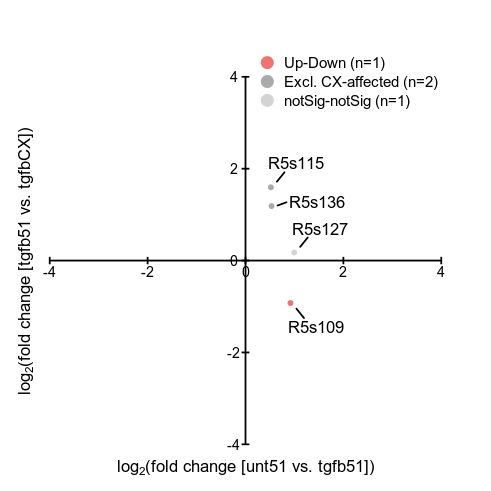

In [12]:
nticks=5; xmax=4; ymax=4; gap_tick_label=3
gg <- ggplot(data=df_fig_r5s,
    aes(x=log2FCunt48VStgfb48.translation, 
        y=log2FCtgfbVStgfbCX5461100nm.translation, colour=fig.type)) + 
    theme_geometry(ticks=nticks, xlim=xmax, ylim=ymax, linesize=0.5, 
                   xlab=expression('log'[2]*'(fold change [unt51 vs. tgfb51])'),
                   ylab=expression('log'[2]*'(fold change [tgfb51 vs. tgfbCX])'),
                   labsize=3.5, labgap=0.5, epsilon=max(xmax,ymax)/50, gap_tick_label=gap_tick_label) +
    geom_point(alpha=1, size=1) +
    theme(legend.title=element_blank(), 
          legend.text=element_text(size=9),
          legend.background = element_rect(color = NA),
          legend.key = element_rect(fill = "white", color = NA),
          legend.key.size = unit(0.4, "cm"),
          legend.key.width = unit(0,"cm"),
          legend.spacing.y = unit(0, "cm"),          
          legend.position = c(0.53, 0.95), legend.justification = c(0, 1) ) +
    guides(colour = guide_legend(override.aes = list(size=3))) +
    ggtitle("") +
    scale_colour_manual(values = nv_color)

if (f_display_sym) {
    
  df_fig_r5s$sig <- 'no'; 
  f_sym <- grepl('.', df_fig_r5s$sym)  
  #f_sym <- grepl('Up-Up', df_fig_r5s$fig.type)    
  # n-R5s197: notSig up
  # n-R5s156 s205: up up
  # n-R5s161: up down
  # n-R5s40: up notSig   
  #f_sym <- grepl('n-R5s197|n-R5s205|n-R5s161|n-R5s40', df_fig_r5s$sym)
    
  th_log2fc <- log2(1.2)
  #f_up_dn <- !is.na(df_fig_r5s$fig.type) & df_fig_r5s$log2FCunt48VStgfb48.translation > th_log2fc & df_fig_r5s$log2FCtgfbVStgfbCX5461100nm.translation < -th_log2fc
  #f_up_up <- !is.na(df_fig_r5s$fig.type) & df_fig_r5s$log2FCunt48VStgfb48.translation > th_log2fc & df_fig_r5s$log2FCtgfbVStgfbCX5461100nm.translation > th_log2fc
  f_up_dn <- !is.na(df_fig_r5s$fig.type) 
  f_up_up <- !is.na(df_fig_r5s$fig.type)
  df_fig_r5s$sig[f_up_dn & f_sym] <- 'up_dn';
  df_fig_r5s$sig[f_up_up & f_sym] <- 'up_up';
  f <- grepl("Gm|Rik", df_fig_r5s$sym)
  df_fig_r5s$sig[f] <- 'no'

  require('ggrepel')
  df_fig_r5s$nudge_x <- 0.2
  df_fig_r5s$nudge_y <- 0.2
  f <- grepl("n-R5s109", df_fig_r5s$sym)
  df_fig_r5s[f, 'nudge_x'] <- 0.2  
  df_fig_r5s[f, 'nudge_y'] <- -0.2
    
  # change name
  df_fig_r5s$sym <- mgsub::mgsub(df_fig_r5s$sym,
        tolower(c('HALLMARK','_')), c('',' '))
  #df_fig_r5s$sym <- str_wrap(df_fig_r5s$sym, width=15)

  f <- df_fig_r5s$sig != 'no'
  if (any(f)) {
  df1 <- df_fig_r5s[f,,drop=F]          
  gg <- gg + geom_text_repel(data=df1,
           aes(label=gsub("n-","",sym), lineheight=.75),
           size=3.5, colour='black',
           force=1, box.padding=0.25, point.padding=0.5,
           min.segment.length = unit(0, 'lines'),          
           nudge_x=df1$nudge_x, nudge_y=df1$nudge_y,
           seed=seed_geom_text_repel)
  }
             
}


print_figure(gg, width=4.1, height=4.1,
            file=sprintf("scatter_plot.fig4%s_r5s_chr8", fname_appendix))

## circlize

,V1,V2,V3,V4,V5
,<chr>,<dbl>,<dbl>,<chr>,<chr>
327,chr8,0,15940729,qA1.1,gpos100
328,chr8,15940729,16878419,qA1.2,gneg
329,chr8,16878419,20160333,qA1.3,gpos33
330,chr8,20160333,29537233,qA2,gneg
331,chr8,29537233,33756838,qA3,gpos33
332,chr8,33756838,44071427,qA4,gneg
333,chr8,44071427,48291032,qB1.1,gpos66
334,chr8,48291032,50166412,qB1.2,gneg
335,chr8,50166412,55792551,qB1.3,gpos66


Note: 2 points are out of plotting region in sector 'chr8', track '2'.

Note: 2 points are out of plotting region in sector 'chr8', track '2'.

Note: 2 points are out of plotting region in sector 'chr8', track '4'.

Note: 2 points are out of plotting region in sector 'chr8', track '4'.



png 
  2

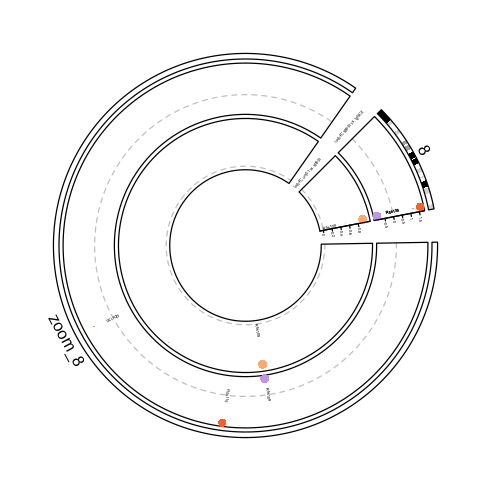

In [13]:
library(circlize)

extend_chromosomes = function(bed, chromosome, prefix = "zoom_") {
    zoom_bed = bed[bed[[1]] %in% chromosome, , drop = FALSE]
    zoom_bed[[1]] = paste0(prefix, zoom_bed[[1]])
    rbind(bed, zoom_bed)
}

cytoband = read.cytoband(cytoband = system.file(package = "circlize",
    "extdata", "cytoBand.txt"), species = "mm10")
cytoband_df = cytoband$df
f <- cytoband_df[,1]=='chr8'
cytoband_df <- cytoband_df[f,]
chromosome = cytoband$chromosome

#xrange = c(cytoband$chr.len, cytoband$chr.len[c("chr8")])
normal_chr_index = 8
zoomed_chr_index = 25

# normalize in normal chromsomes and zoomed chromosomes separately
sector.width = c(0.1,0.9)

#df_range <- extend_chromosomes(cytoband_df, c("chr8"))
#f <- df_range[,1]=="chr8" | 
#(df_range[,1]=="zoom_chr8" & df_range[,2] > 119200000 & df_range[,3] < 131500000)
#df_range <- df_range[f,]
df_range <- cytoband_df
# cluster: 
# cluster: chr8:123,531,582-123,630,652
#df_range <- rbind(df_range, data.frame(V1="zoom_chr8", V2=122500000,V3=127300000, V4="qE1", V5="gneg"))
df_range <- rbind(df_range, data.frame(V1="zoom_chr8", V2=123500000,V3=123700000, V4="qE1", V5="gneg"))
df_range

circos.par(start.degree = 45, gap.degree = 10)
circos.initializeWithIdeogram(df_range, sector.width = sector.width,
                             plotType = c("ideogram", "labels"))

col_score <- colorRamp2(c(-2, 0, 2), c("#0000ff", "#ffffcc", "#ff0000"))
col_fun = colorRamp2(breaks = -log10(c(1, 0.05, 1e-04)), colors = c("green", "black", 
    "red"))
p_value = c(0.8, 0.5, 0.001)

# CX5461
df <- df_fig_r5s[, c("seqnames", "start", "end", "log2FCtgfbVStgfbCX5461100nm.translation", 
    "FDRtgfbVStgfbCX5461100nm.translation")]
colnames(df) <- c("chr", "start", "end", "value1", "value2")
df$chr <- paste0("chr", df$chr)
df$label <- gsub("n-", "", rownames(df))

circos.genomicTrackPlotRegion(extend_chromosomes(df, c("chr8")), stack = FALSE, track.height = 0.25, panel.fun = function(region, 
    value, ...) {
    cell.xlim = get.cell.meta.data("cell.xlim")
    circos.lines(cell.xlim, c(0, 0), lty = 2, col = "#00000040")
    cex = (-log10(value[[2]] + 1e-10))/10
    circos.genomicPoints(region, value, numeric.column = 1, cex = cex, col = col_score(value[[1]]), 
        pch = 16, ...)
    f <- value[[2]] < 0.05
    if (any(f)) {
        circos.genomicText(region[f, , drop = F], value[f, , drop = F], y = 0, labels.column = 3, 
            facing = "clockwise", adj = c(0.5, 0), cex = 0.2)
    }
})

circos.yaxis(side = "right", at = NULL, sector.index = "chr8", labels.cex = 0.2)
circos.text(sector.index = "chr8", track.index = 2, get.cell.meta.data("cell.xlim") - 
    1.1*min(get.cell.meta.data("cell.xlim")), get.cell.meta.data("cell.ylim")-4,
    labels = expression(paste(log[2], FC, ~tgfb51, ~vs., ~tgfbCX)),
    facing = "clockwise", niceFacing = TRUE, adj = c(0.5, 0), cex = 0.2)

# tgfb48
df <- df_fig_r5s[, c("seqnames", "start", "end", "log2FCunt48VStgfb48.translation", 
    "FDRunt48VStgfb48.translation")]
colnames(df) <- c("chr", "start", "end", "value1", "value2")
df$chr <- paste0("chr", df$chr)
df$label <- gsub("n-", "", rownames(df))

circos.genomicTrackPlotRegion(extend_chromosomes(df, c("chr8")), stack = FALSE, track.height = 0.25, panel.fun = function(region, 
    value, ...) {
    cell.xlim = get.cell.meta.data("cell.xlim")
    circos.lines(cell.xlim, c(0, 0), lty = 2, col = "#00000040")
    cex = (-log10(value[[2]] + 1e-10))/10
    circos.genomicPoints(region, value, numeric.column = 1, cex = cex, col = col_score(value[[1]]), 
        pch = 16, ...)
    f <- value[[2]] < 0.05
    if (any(f)) {
        circos.genomicText(region[f, , drop = F], value[f, , drop = F], y = 0, labels.column = 3, 
            facing = "clockwise", adj = c(0, 0.5), cex = 0.2)
    }
})

circos.yaxis(side = "right", at = NULL, sector.index = "chr8", labels.cex = 0.2)
circos.text(sector.index = "chr8", track.index = 4, get.cell.meta.data("cell.xlim") - 
    1.1*min(get.cell.meta.data("cell.xlim")), get.cell.meta.data("cell.ylim"),
    labels = expression(paste(log[2], FC, ~unt51, ~vs., ~tgfb51)),
    facing = "clockwise", niceFacing = TRUE, adj = c(0, 0), cex = 0.2)


circos.clear()

pl <- recordPlot()

file <- sprintf("circlize.fig4%s_r5s_chr8", fname_appendix)
filename <- sprintf("tiff/%s.tiff", file)
tiff(filename, width = 4.1, height = 4.1, units = "in", res = 600, compression = "lzw", 
    type = "cairo")
print(pl)
dev.off()

# ETS5 and Rn18s

In [14]:
df_fig_ets  <- df_fig
df_fig_ets$sym <- rownames(df_fig_ets)

f <- grepl("ETS5|Rn18s", df_fig_ets$sym)
df_fig_ets <- df_fig_ets[f,]
dim(df_fig_ets)

vec <- gsub(" \\(.*\\)","", df_fig_ets$fig.type)
vec_u <- levels(df_fig$fig.type)
vec_u <- gsub(" \\(.*\\)","", vec_u)
levels_fig.type <- vec_u
vec_u
for (i in 1:length(vec_u)) {
    idx <- grep(vec_u[i], vec)
    levels_fig.type[i] <- sprintf("%s (n=%d)", vec_u[i], length(idx))
    vec[idx] <- levels_fig.type[i]
}

f <- df_fig_ets$unt48.tgfb48.DEtranslation == "up" & df_fig_ets$tgfb48.tgfbCX5461100nm.DEtranslation == "notSig"
str_up_no <- sprintf("Up-notSig (n=%d)", length(which(f)))
vec[f] <- str_up_no

f <- df_fig_ets$unt48.tgfb48.DEtranslation == "notSig" & df_fig_ets$tgfb48.tgfbCX5461100nm.DEtranslation == "notSig"
str_no_no <- sprintf("notSig-notSig (n=%d)", length(which(f)))
vec[f] <- str_no_no


df_fig_ets$fig.type <- factor(vec, level = c(levels_fig.type, str_up_no, str_no_no))
nv_color <- c(`Up-Down` = "#ed7470", `Down-Up` = "#7aaa3d", `Up-Up` = "#e5af3c", 
    `Down-Down` = "#73c4fa", `Exclusively CX-affected` = "#aaaaaa")
nv_color <- c(nv_color, `Up-notSig` = "#ffc0cb", `notSig-notSig` = "#d3d3d3")
names(nv_color) <- c(levels_fig.type, str_up_no, str_no_no)

df_fig_ets
dim(df_fig_ets)

[1]  4 34

[1] "Up-Down"           "Down-Up"           "Up-Up"            
[4] "Down-Down"         "Excl. CX-affected"

,seqnames,start,end,width,strand,source,unt48.transcription,tgfb48.transcription,tgfbCX5461100nm.transcription,log2FCunt48VStgfb48.transcription,⋯,log2FCtgfbVStgfbCX5461100nm.translation,FDRtgfbVStgfbCX5461100nm.translation,PtgfbVStgfbCX5461100nm.translation,unt48.tgfb48.DEtranslation,tgfb48.tgfbCX5461100nm.DEtranslation,reversible.translation,biotype,fig.type,order,sym
,<fct>,<int>,<int>,<int>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<fct>,<fct>,<chr>
rDNA_ETS5,BK000964.3,142,4148,4007,+,stjude,12.25190,12.71152,12.33807,0.4596219,⋯,-3.083703,6.875541e-04,3.17087e-05,notSig,down,notSig,rDNA,Excl. CX-affected (n=3),Excl. CX-affected (n=945),rDNA_ETS5
rDNA_Rn18s,BK000964.3,4149,6018,1870,+,stjude,17.91930,17.76312,17.41821,-0.1561790,⋯,-1.037028,2.115218e-05,5.52200e-07,notSig,down,notSig,rRNA,Excl. CX-affected (n=3),Excl. CX-affected (n=945),rDNA_Rn18s
Rn18s-rs5,17,39846354,39848202,1849,+,havana,15.29440,14.98166,14.84140,-0.3127357,⋯,-1.218982,1.775765e-05,4.55000e-07,notSig,down,notSig,rRNA,Excl. CX-affected (n=3),Excl. CX-affected (n=945),Rn18s-rs5
rDNA_ETS5_chr17,17,39842997,39846353,3357,+,havana,11.80699,12.27892,11.82322,0.4719285,⋯,-3.108084,3.540824e-04,1.40702e-05,up,down,upDown,misc_RNA,Up-Down (n=1),Up-Down (n=414),rDNA_ETS5_chr17


[1]  4 34

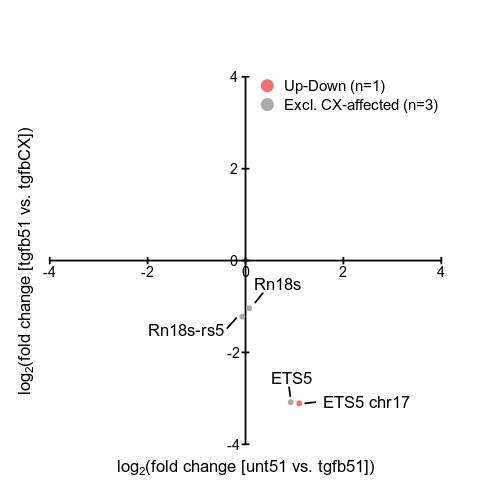

In [15]:
nticks=5; xmax=4; ymax=4; gap_tick_label=3
# epsilon: tick length
gg <- ggplot(data=df_fig_ets,
    aes(x=log2FCunt48VStgfb48.translation, 
        y=log2FCtgfbVStgfbCX5461100nm.translation, colour=fig.type)) + 
    theme_geometry(ticks=nticks, xlim=xmax, ylim=ymax, linesize=0.5, 
                   xlab=expression('log'[2]*'(fold change [unt51 vs. tgfb51])'),
                   ylab=expression('log'[2]*'(fold change [tgfb51 vs. tgfbCX])'),
                   labsize=3.5, labgap=0.5, epsilon=max(xmax,ymax)/50, gap_tick_label=gap_tick_label) +
    geom_point(alpha=1, size=1) +
    theme(legend.title=element_blank(), 
          legend.text=element_text(size=9),
          legend.background = element_rect(color = NA),
          legend.key = element_rect(fill = "white", color = NA),
          legend.key.size = unit(0.4, "cm"),
          legend.key.width = unit(0,"cm"),
          legend.spacing.y = unit(0, "cm"),          
          legend.position = c(0.53, 0.9), legend.justification = c(0, 1) ) +
    guides(colour = guide_legend(override.aes = list(size=3))) +
    ggtitle("") +
    scale_colour_manual(values = nv_color)

if (f_display_sym) {
    
  df_fig_ets$sig <- 'no'; 
  f_sym <- grepl('.', df_fig_ets$sym)  
  #f_sym <- grepl('Up-Down', df_fig_ets$fig.type)    

    
  th_log2fc <- log2(1.2)
  #f_up_dn <- !is.na(df_fig_ets$fig.type) & df_fig_ets$log2FCunt48VStgfb48.translation > th_log2fc & df_fig_ets$log2FCtgfbVStgfbCX5461100nm.translation < -th_log2fc
  #f_up_up <- !is.na(df_fig_ets$fig.type) & df_fig_ets$log2FCunt48VStgfb48.translation > th_log2fc & df_fig_ets$log2FCtgfbVStgfbCX5461100nm.translation > th_log2fc
  f_up_dn <- !is.na(df_fig_ets$fig.type) 
  f_up_up <- !is.na(df_fig_ets$fig.type)
  df_fig_ets$sig[f_up_dn & f_sym] <- 'up_dn';
  df_fig_ets$sig[f_up_up & f_sym] <- 'up_up';
  f <- grepl("Gm|Rik", df_fig_ets$sym)
  df_fig_ets$sig[f] <- 'no'

  require('ggrepel')
  df_fig_ets$nudge_x <- 0.2
  df_fig_ets$nudge_y <- 0.2
  f <- grepl("Rn18s-", df_fig_ets$sym)
  df_fig_ets[f, 'nudge_x'] <- -0.5  
  df_fig_ets[f, 'nudge_y'] <- 0
  f <- grepl("Rn18s$", df_fig_ets$sym)
  df_fig_ets[f, 'nudge_x'] <- 0
  df_fig_ets[f, 'nudge_y'] <- 0
    
  # change name
  df_fig_ets$sym <- mgsub::mgsub(df_fig_ets$sym,
        tolower(c('HALLMARK','_')), c('',' '))
  #df_fig_ets$sym <- str_wrap(df_fig_ets$sym, width=15)

  f <- df_fig_ets$sig != 'no'
  if (any(f)) {
  df1 <- df_fig_ets[f,,drop=F]          
  gg <- gg + geom_text_repel(data=df1,
           aes(label=gsub("rDNA","",sym), lineheight=.75),
           size=3.5, colour='black',
           force=1, box.padding=0.25, point.padding=0.5,
           min.segment.length = unit(0, 'lines'),          
           nudge_x=df1$nudge_x, nudge_y=df1$nudge_y,
           seed=seed_geom_text_repel)
  }
             
}


print_figure(gg, width=4.1, height=4.1,
            file=sprintf("scatter_plot.fig4%s_ets5_r18s", fname_appendix))

# snoRNAs

In [16]:
df_fig_snorna  <- df_fig
df_fig_snorna$sym <- rownames(df_fig_snorna)

# Snord43 ENSMUSG00000105167 was annotated as miRNA 
f <- grep("^Sno", df_fig_snorna$sym)
df_fig_snorna <- df_fig_snorna[f,]
dim(df_fig_snorna)

#f <- grepl("snoRNA", df_fig_snorna$biotype)
#df_fig_snorna <- df_fig_snorna[f,]
#dim(df_fig_snorna)

unique(paste(df_fig_snorna$unt48.tgfb48.DEtranslation,
    df_fig_snorna$tgfb48.tgfbCX5461100nm.DEtranslation))

f <- !is.na(df_fig_snorna$tgfb48.tgfbCX5461100nm.DEtranslation)
df_fig_snorna <- df_fig_snorna[f,]
dim(df_fig_snorna)

vec <- gsub(" \\(.*\\)","", df_fig_snorna$fig.type)
vec_u <- levels(df_fig$fig.type)
vec_u <- gsub(" \\(.*\\)","", vec_u)
levels_fig.type <- vec_u
vec_u
for (i in 1:length(vec_u)) {
    idx <- grep(vec_u[i], vec)
    levels_fig.type[i] <- sprintf("%s (n=%d)", vec_u[i], length(idx))
    vec[idx] <- levels_fig.type[i]
}

f <- df_fig_snorna$unt48.tgfb48.DEtranslation == "up" & df_fig_snorna$tgfb48.tgfbCX5461100nm.DEtranslation == "notSig"
str_up_no <- sprintf("Up-notSig (n=%d)", length(which(f)))
vec[f] <- str_up_no

f <- df_fig_snorna$unt48.tgfb48.DEtranslation == "notSig" & df_fig_snorna$tgfb48.tgfbCX5461100nm.DEtranslation == "notSig"
str_no_no <- sprintf("notSig-notSig (n=%d)", length(which(f)))
vec[f] <- str_no_no


df_fig_snorna$fig.type <- factor(vec, level = c(levels_fig.type, str_up_no, str_no_no))
nv_color <- c(`Up-Down` = "#ed7470", `Down-Up` = "#7aaa3d", `Up-Up` = "#e5af3c", 
    `Down-Down` = "#73c4fa", `Exclusively CX-affected` = "#aaaaaa")
nv_color <- c(nv_color, `Up-notSig` = "#ffc0cb", `notSig-notSig` = "#d3d3d3")
names(nv_color) <- c(levels_fig.type, str_up_no, str_no_no)

df_fig_snorna
dim(df_fig_snorna)

[1] 25 34

[1] "notSig down"   "up down"       "NA NA"         "notSig notSig"
[5] "up notSig"

[1] 16 34

[1] "Up-Down"           "Down-Up"           "Up-Up"            
[4] "Down-Down"         "Excl. CX-affected"

,seqnames,start,end,width,strand,source,unt48.transcription,tgfb48.transcription,tgfbCX5461100nm.transcription,log2FCunt48VStgfb48.transcription,⋯,log2FCtgfbVStgfbCX5461100nm.translation,FDRtgfbVStgfbCX5461100nm.translation,PtgfbVStgfbCX5461100nm.translation,unt48.tgfb48.DEtranslation,tgfb48.tgfbCX5461100nm.DEtranslation,reversible.translation,biotype,fig.type,order,sym
,<fct>,<int>,<int>,<int>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<fct>,<fct>,<chr>
Snord104,11,106500993,106501062,70,+,ensembl,1.0090121,0.3009080,-0.9426757,-0.70810409,⋯,-2.1362112,0.046655227,0.0073977156,notSig,down,notSig,snoRNA,Excl. CX-affected (n=2),Excl. CX-affected (n=945),Snord104
Snord23,7,15938762,15938870,109,-,ensembl,NA,NA,NA,NA,⋯,-3.5411787,0.004524677,0.0003224100,notSig,down,notSig,snoRNA,Excl. CX-affected (n=2),Excl. CX-affected (n=945),Snord23
Snora20,17,12922790,12922917,128,+,ensembl,NA,NA,NA,NA,⋯,-2.5147856,0.024558594,0.0030131350,up,down,upDown,snoRNA,Up-Down (n=4),Up-Down (n=414),Snora20
Snora73a,4,132352775,132352979,205,-,ensembl,NA,NA,NA,NA,⋯,-4.4673531,0.000116671,0.0000037405,up,down,upDown,snoRNA,Up-Down (n=4),Up-Down (n=414),Snora73a
Snora73b,4,132352322,132352526,205,-,ensembl,NA,NA,NA,NA,⋯,-2.7575200,0.020534639,0.0023268488,up,down,upDown,snoRNA,Up-Down (n=4),Up-Down (n=414),Snora73b
Snord43,15,80082847,80082954,108,-,ensembl,-1.7382123,-3.1463945,-2.5172594,-1.40818222,⋯,-2.4406377,0.016437903,0.0017354917,up,down,upDown,snoRNA,Up-Down (n=4),Up-Down (n=414),Snord43
Snora23,7,110046364,110046547,184,+,ensembl,0.3327816,-1.2425017,-0.1117601,-1.57528323,⋯,0.4825882,0.501773682,0.2711411690,notSig,notSig,notSig,snoRNA,notSig-notSig (n=7),NA,Snora23
Snora31,14,75847905,75848034,130,+,ensembl,-1.7348095,-0.8436170,-1.9207414,0.89119246,⋯,-0.8959643,0.587398330,0.3538133616,notSig,notSig,notSig,snoRNA,notSig-notSig (n=7),NA,Snora31
Snora78,17,24719676,24719803,128,-,ensembl,-0.1466224,-0.2272837,-0.5743419,-0.08066124,⋯,-0.2918738,0.671183388,0.4499434612,up,notSig,notSig,snoRNA,Up-notSig (n=3),NA,Snora78


[1] 16 34

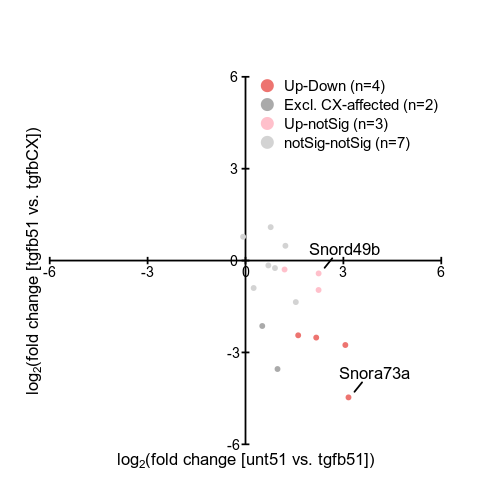

In [17]:
nticks=5; xmax=6; ymax=6; gap_tick_label=3
# epsilon: tick length
gg <- ggplot(data=df_fig_snorna,
    aes(x=log2FCunt48VStgfb48.translation, 
        y=log2FCtgfbVStgfbCX5461100nm.translation, colour=fig.type)) + 
    theme_geometry(ticks=nticks, xlim=xmax, ylim=ymax, linesize=0.5, 
                   xlab=expression('log'[2]*'(fold change [unt51 vs. tgfb51])'),
                   ylab=expression('log'[2]*'(fold change [tgfb51 vs. tgfbCX])'),
                   labsize=3.5, labgap=0.5, epsilon=max(xmax,ymax)/50, gap_tick_label=gap_tick_label) +
    geom_point(alpha=1, size=1) +
    theme(legend.title=element_blank(), 
          legend.text=element_text(size=9),
          legend.background = element_rect(color = NA),
          legend.key = element_rect(fill = "white", color = NA),
          legend.key.size = unit(0.4, "cm"),
          legend.key.width = unit(0,"cm"),
          legend.spacing.y = unit(0, "cm"),          
          legend.position = c(0.53, 0.9), legend.justification = c(0, 1) ) +
    guides(colour = guide_legend(override.aes = list(size=3))) +
    ggtitle("") +
    scale_colour_manual(values = nv_color)

if (f_display_sym) {
    
  df_fig_snorna$sig <- 'no'; 
  f_sym <- grepl('.', df_fig_snorna$sym)  
  #f_sym <- grepl('Up-Down', df_fig_snorna$fig.type)    
  f_sym <- grepl('Snora73a|Snord49b', df_fig_snorna$sym)  

  th_log2fc <- log2(1.2)
  #f_up_dn <- !is.na(df_fig_snorna$fig.type) & df_fig_snorna$log2FCunt48VStgfb48.translation > th_log2fc & df_fig_snorna$log2FCtgfbVStgfbCX5461100nm.translation < -th_log2fc
  #f_up_up <- !is.na(df_fig_snorna$fig.type) & df_fig_snorna$log2FCunt48VStgfb48.translation > th_log2fc & df_fig_snorna$log2FCtgfbVStgfbCX5461100nm.translation > th_log2fc
  f_up_dn <- !is.na(df_fig_snorna$fig.type) 
  f_up_up <- !is.na(df_fig_snorna$fig.type)
  df_fig_snorna$sig[f_up_dn & f_sym] <- 'up_dn';
  df_fig_snorna$sig[f_up_up & f_sym] <- 'up_up';
  f <- grepl("Gm|Rik", df_fig_snorna$sym)
  df_fig_snorna$sig[f] <- 'no'

  require('ggrepel')
  df_fig_snorna$nudge_x <- 0.2
  df_fig_snorna$nudge_y <- 0.2
  f <- grepl("Rn18s-", df_fig_snorna$sym)
  df_fig_snorna[f, 'nudge_x'] <- -0.5  
  df_fig_snorna[f, 'nudge_y'] <- 0
  f <- grepl("Rn18s$", df_fig_snorna$sym)
  df_fig_snorna[f, 'nudge_x'] <- 0
  df_fig_snorna[f, 'nudge_y'] <- 0
    
  # change name
  df_fig_snorna$sym <- mgsub::mgsub(df_fig_snorna$sym,
        tolower(c('HALLMARK','_')), c('',' '))
  #df_fig_snorna$sym <- str_wrap(df_fig_snorna$sym, width=15)

  f <- df_fig_snorna$sig != 'no'
  if (any(f)) {
  df1 <- df_fig_snorna[f,,drop=F]          
  gg <- gg + geom_text_repel(data=df1,
           aes(label=gsub("rDNA","",sym), lineheight=.75),
           size=3.5, colour='black',
           force=1, box.padding=0.25, point.padding=0.5,
           min.segment.length = unit(0, 'lines'),          
           nudge_x=df1$nudge_x, nudge_y=df1$nudge_y,
           seed=seed_geom_text_repel)
  }
             
}


print_figure(gg, width=4.1, height=4.1,
            file=sprintf("scatter_plot.fig4%s_snorna", fname_appendix))